In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


sns.set(font_scale=1)

In [3]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [4]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check the correlation of all values with SalePrice

In [6]:
corr = df_train.iloc[:,1:].corr().sort_values(by='SalePrice',ascending=False).round(2)

In [7]:
corr['SalePrice'].head(10)

SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
Name: SalePrice, dtype: float64

In [8]:
df_train['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [9]:
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

### Find the outliers and other

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

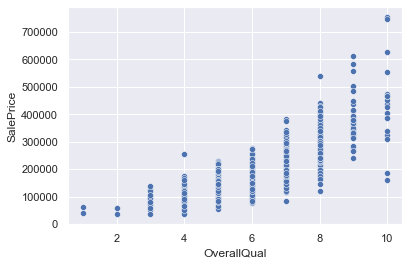

In [10]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_train)

In [11]:
df_train['GrLivArea'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

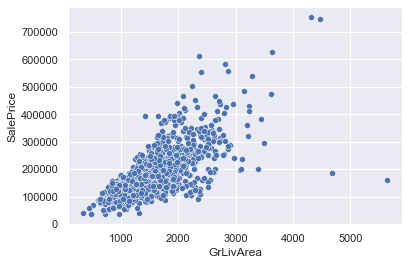

In [12]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [13]:
df_train = df_train.drop(df_train.loc[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<200000)].index)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

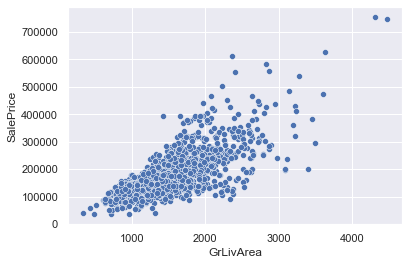

In [14]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [15]:
corr = df_train.iloc[:,1:].corr().sort_values(by='SalePrice',ascending=False).round(2)

In [16]:
corr['SalePrice']

SalePrice        1.00
OverallQual      0.80
GrLivArea        0.73
TotalBsmtSF      0.65
GarageCars       0.64
1stFlrSF         0.63
GarageArea       0.63
FullBath         0.56
TotRmsAbvGrd     0.54
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.41
LotFrontage      0.37
WoodDeckSF       0.32
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.28
LotArea          0.27
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.10
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

<AxesSubplot:>

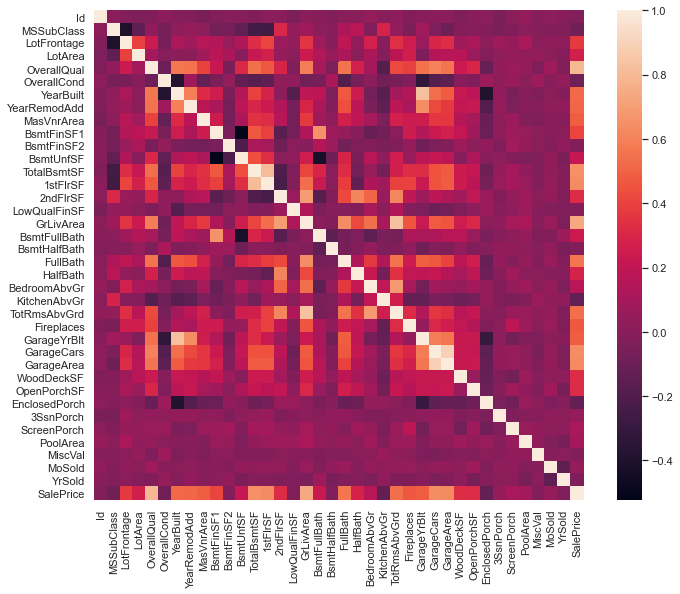

In [17]:
plt.subplots(figsize=(12,9))
sns.heatmap(data=df_train.corr(),square=True)

In [18]:
top10corr = corr['SalePrice'].head(10).index

### Don't forget to .T to transpose!

In [19]:
cm = np.corrcoef(df_train[top10corr].values.T)

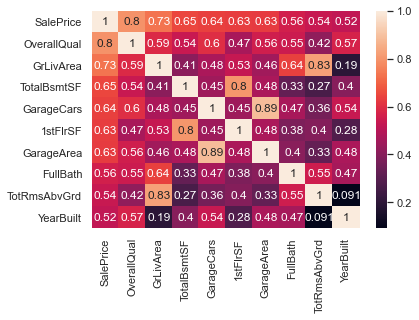

In [20]:
sns.set(font_scale=1)
hm = sns.heatmap(cm,annot=True,yticklabels=top10corr.values, xticklabels=top10corr.values)
plt.show()

In [21]:
trainrow = df_train.shape[0]
testrow = df_train.shape[1]

In [22]:
testids = df_test['Id'].copy()

In [23]:
y_train = df_train['SalePrice'].copy()

In [24]:
data = pd.concat((df_train,df_test)).reset_index(drop=True)

In [25]:
data = data.drop('SalePrice',1)

In [26]:
data = data.iloc[:,1:]

In [27]:
data.shape

(2917, 79)

### Clean missing Data

In [28]:
missingper = data.isnull().sum().sort_values(ascending=False)/data.shape[0]

In [29]:
missingper = missingper.round(3)
missingper

PoolQC           0.997
MiscFeature      0.964
Alley            0.932
Fence            0.804
FireplaceQu      0.487
                 ...  
1stFlrSF         0.000
2ndFlrSF         0.000
LowQualFinSF     0.000
GrLivArea        0.000
SaleCondition    0.000
Length: 79, dtype: float64

In [30]:
missingnum = data.isnull().sum().sort_values(ascending=False)
missingnum

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
                 ... 
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
SaleCondition       0
Length: 79, dtype: int64

In [31]:
missingcheck = pd.concat([missingnum,missingper],axis=1, keys=['Total','Percent'])
missingcheck.head(50)

,Total,Percent
PoolQC,2908,0.997
MiscFeature,2812,0.964
Alley,2719,0.932
Fence,2346,0.804
FireplaceQu,1420,0.487
LotFrontage,486,0.167
GarageYrBlt,159,0.055
GarageFinish,159,0.055
GarageQual,159,0.055
GarageCond,159,0.055


In [32]:
def missingchecker():
    missingper = data.isnull().sum().sort_values(ascending=False)/data.shape[0]
    missingnum = data.isnull().sum().sort_values(ascending=False)
    missingcheck = pd.concat([missingnum,missingper],axis=1, keys=['Total','Percent'])
    return missingcheck.head(10)


Most missing information fill NA

In [33]:
data['PoolQC']=data['PoolQC'].fillna('NA')
data['MiscFeature']=data['MiscFeature'].fillna('NA')
data['Alley']=data['Alley'].fillna('NA')
data['Fence']=data['Fence'].fillna('NA')
data['FireplaceQu']=data['FireplaceQu'].fillna('NA')

In [34]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [35]:
corrtemp = df_train.iloc[:,1:].corr().sort_values(by='GarageYrBlt',ascending=False).round(2)
corrtemp['GarageYrBlt']

GarageYrBlt      1.00
YearBuilt        0.83
YearRemodAdd     0.64
GarageCars       0.59
GarageArea       0.57
OverallQual      0.55
SalePrice        0.49
FullBath         0.48
TotalBsmtSF      0.33
MasVnrArea       0.25
1stFlrSF         0.23
GrLivArea        0.23
OpenPorchSF      0.22
WoodDeckSF       0.22
HalfBath         0.20
BsmtUnfSF        0.19
BsmtFinSF1       0.15
TotRmsAbvGrd     0.14
BsmtFullBath     0.12
MSSubClass       0.08
2ndFlrSF         0.07
LotFrontage      0.06
Fireplaces       0.04
3SsnPorch        0.02
MoSold           0.01
YrSold          -0.00
PoolArea        -0.03
MiscVal         -0.03
LotArea         -0.03
LowQualFinSF    -0.04
BedroomAbvGr    -0.06
ScreenPorch     -0.08
BsmtHalfBath    -0.08
BsmtFinSF2      -0.09
KitchenAbvGr    -0.12
EnclosedPorch   -0.30
OverallCond     -0.32
Name: GarageYrBlt, dtype: float64

In [36]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'])

In [37]:
data['GarageCond'] = data['GarageCond'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageType']=data['GarageType'].fillna('NA')

In [38]:
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')

In [39]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [40]:
data['MasVnrType']=data['MasVnrType'].fillna('None')

In [41]:
data['MSZoning'] = data['MSZoning'].fillna('RL')

In [42]:
data['MSZoning'].value_counts()

RL         2267
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [43]:
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['Functional']=data['Functional'].fillna('Typ')
data['Utilities']=data['Utilities'].fillna('AllPub')

In [44]:
data['Utilities']=data['Utilities'].fillna('VinylSd')
data['KitchenQual']=data['KitchenQual'].fillna('TA')
data['SaleType']=data['SaleType'].fillna('WD')
data['Electrical']=data['Electrical'].fillna('SBrkr')

In [45]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [46]:
missingchecker()

,Total,Percent
Exterior2nd,1,0.000343
GarageCars,1,0.000343
GarageArea,1,0.000343
TotalBsmtSF,1,0.000343
BsmtUnfSF,1,0.000343
BsmtFinSF2,1,0.000343
BsmtFinSF1,1,0.000343
Exterior1st,1,0.000343
TotRmsAbvGrd,0,0.000000
GarageType,0,0.000000


In [47]:
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
data['Exterior1st']=data['Exterior1st'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'])
data['GarageCars']=data['GarageCars'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)

In [48]:
missingchecker()

,Total,Percent
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
HalfBath,0,0.0


<AxesSubplot:>

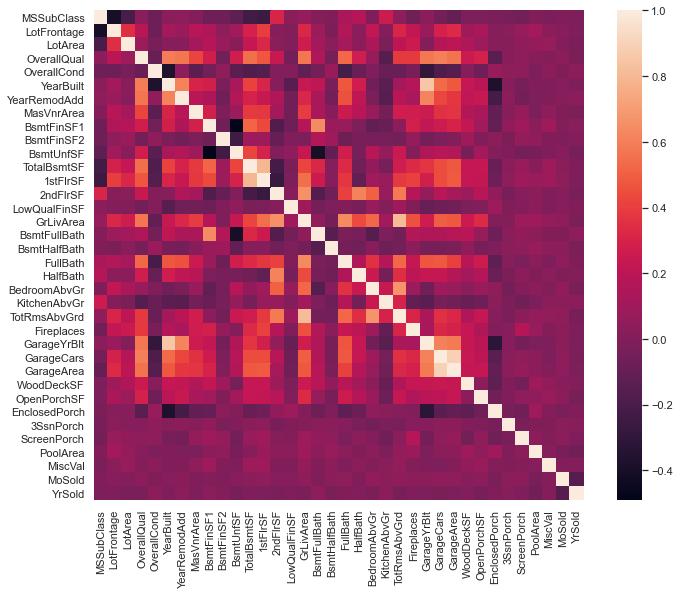

In [49]:
plt.subplots(figsize=(12,9))
sns.heatmap(data=data.corr(),square=True)

Done with cleaning the data

## Feature Engineering

In [50]:
#as we know some feature are highly co-related with SalePrice so lets create some feature using these features

data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [51]:
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],axis = 1)

In [52]:
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
data['CentralAir'] = data['CentralAir'].map({'Y':1, 'N':0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
data['PavedDrive'] = data['PavedDrive'].map({'Y':1, 'P':0.5, 'N':0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':0})
data['Electrical'] = data['Electrical'].map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0})
data['Fence'] = data['Fence'].map({'GdPrv':4, 'MnPrv':3, 'FdWo':2, 'MnWw':1, 'NA':0})

In [53]:
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [54]:
data['Remodeled']=0
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled']=1
data=data.drop('YearRemodAdd',1)
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [55]:
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [56]:
data.shape

(2917, 323)

add 1stFlrSF and 2ndFlrSF and create new feature floorfeet

In [57]:

data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,2003,196.0,1,706.0,0.0,150.0,856.0,1,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,1976,0.0,4,978.0,0.0,284.0,1262.0,1,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,2001,162.0,2,486.0,0.0,434.0,920.0,1,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,1915,0.0,1,216.0,0.0,540.0,756.0,1,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,2000,350.0,3,655.0,0.0,490.0,1145.0,1,...,0,0,0,0,0,0,0,0,1,0


In [58]:
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

In [59]:
data['Bath']=data['BsmtFullBath']+data['BsmtHalfBath']*.5+data['FullBath']+data['HalfBath']*.5
data=data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

In [60]:
data.loc[data['GarageYrBlt']==2207.,'GarageYrBlt']=0

## Split data using trainrow data and scale data

In [61]:
x_train = data.iloc[:trainrow]
x_test=data.iloc[trainrow:]
scaler=StandardScaler()
scaler=scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Bath
0,65.0,8450,2003,196.0,1,706.0,0.0,150.0,856.0,1,...,0,1,0,0,0,0,0,0,0,3.5
1,80.0,9600,1976,0.0,4,978.0,0.0,284.0,1262.0,1,...,0,0,0,0,0,0,0,0,0,2.5
2,68.0,11250,2001,162.0,2,486.0,0.0,434.0,920.0,1,...,0,0,0,0,0,0,0,0,0,3.5
3,60.0,9550,1915,0.0,1,216.0,0.0,540.0,756.0,1,...,1,0,0,0,0,0,0,0,0,2.0
4,84.0,14260,2000,350.0,3,655.0,0.0,490.0,1145.0,1,...,0,0,1,0,0,0,0,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,62.0,7917,1999,0.0,1,0.0,0.0,953.0,953.0,1,...,1,0,0,0,0,0,0,0,0,2.5
1454,85.0,13175,1978,119.0,1,790.0,163.0,589.0,1542.0,1,...,1,0,0,0,0,0,0,0,0,3.0
1455,66.0,9042,1941,0.0,1,275.0,0.0,877.0,1152.0,1,...,0,0,1,0,0,0,0,0,0,2.0
1456,68.0,9717,1950,0.0,2,49.0,1029.0,0.0,1078.0,1,...,0,0,0,0,0,0,0,0,0,2.0


In [62]:
sendout = x_train.copy()

In [63]:
sendout['SalePrice'] = df_train['SalePrice'].copy()

In [64]:
sendout.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,TotRmsAbvGrd_15,Bath,SalePrice
0,65.0,8450,2003,196.0,1,706.0,0.0,150.0,856.0,1,...,1,0,0,0,0,0,0,0,3.5,208500.0
1,80.0,9600,1976,0.0,4,978.0,0.0,284.0,1262.0,1,...,0,0,0,0,0,0,0,0,2.5,181500.0
2,68.0,11250,2001,162.0,2,486.0,0.0,434.0,920.0,1,...,0,0,0,0,0,0,0,0,3.5,223500.0
3,60.0,9550,1915,0.0,1,216.0,0.0,540.0,756.0,1,...,0,0,0,0,0,0,0,0,2.0,140000.0
4,84.0,14260,2000,350.0,3,655.0,0.0,490.0,1145.0,1,...,0,1,0,0,0,0,0,0,3.5,250000.0


In [65]:
sendout.to_csv('azure.csv',index=False)

# Create models and prediction

### Linear Model

In [66]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(x_train_scaled,y_train)
reg_liner.score(x_train_scaled,y_train)

0.9555961707929358

In [67]:
prediction = reg_liner.predict(x_train_scaled)

Root mean squared error

In [68]:
rmse = mean_squared_error(df_train['SalePrice'],prediction)
mae = mean_absolute_error(df_train['SalePrice'],prediction)
print('Root mean squared error:',rmse)
print('Mean absolute error:',mae)

Root mean squared error: 280415930.7351261
Mean absolute error: 11291.104923002686


### Create a logistic regression model and predict

In [69]:
from sklearn.linear_model import LogisticRegression
reg_logistic=LogisticRegression()
reg_logistic.fit(x_train_scaled,y_train)
print(reg_logistic.score(x_train_scaled,y_train))

0.9993141289437586


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE and MAE

In [70]:
prediction_log = reg_logistic.predict(x_train_scaled)
rmse = mean_squared_error(df_train['SalePrice'],prediction_log)
mae = mean_absolute_error(df_train['SalePrice'],prediction_log)
print('Root mean squared error:',rmse)
print('Mean absolute error:',mae)

Root mean squared error: 38580.246913580246
Mean absolute error: 5.1440329218107


In [71]:
prediction_log = reg_logistic.predict(x_test_scaled)
prediction_log[:50]
output = pd.DataFrame({'Id' : df_test['Id'],'SalePrice': prediction_log})

In [72]:
output.to_csv('submission.csv',index=False)

In [73]:
prediction_log

array([133000, 151500, 192000, ..., 135000,  84500, 240000])

In [74]:
output.to_csv('submission.csv',index=False)

### Create Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(criterion='mse',max_depth=3)
tree.fit(x_train_scaled,y_train)
print(tree.score(x_train_scaled,y_train))

0.7108967951534926


### Create Random Forest Model

In [76]:
rfr=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=40)
rfr.fit(x_train_scaled,y_train)
print(rfr.score(x_train_scaled,y_train))

0.9848619780410771


Best Model from Hypertune Parameters

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40}

Hypertune Parameters for better model

In [77]:
# n_estimators = [200,500]
# max_features = ['auto','sqrt','log2']
# max_depth = [10,20,30,40,50]
# min_samples_split = [2,5,10,15,20]
# min_samples_leaf = [1,2,5,10,15]

In [78]:
# grid_param = {'n_estimators' : n_estimators,
#              'max_features' : max_features,
#              'max_depth' : max_depth,
#              'min_samples_split' : min_samples_split,
#              'min_samples_leaf' : min_samples_leaf}

In [79]:
# rfr=RandomForestRegressor(random_state=1)
# rfr_random = RandomizedSearchCV(estimator = rfr,
#                                param_distributions = grid_param, n_iter = 500,
#                                cv = 5, verbose=2, random_state=123,
#                                n_jobs = -1)


In [80]:
# rfr_random.fit(x_train_scaled, y_train)
# print(rfr_random.best_params_)

### Create XGBoost Model

In [81]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train_scaled, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_train_scaled, y_train)], 
             verbose=False)
print(my_model.score(x_train_scaled,y_train))

0.9912538161295252


In [82]:
prediction = my_model.predict(x_train_scaled)

In [83]:
rmse = mean_squared_error(df_train['SalePrice'],prediction)
mae = mean_absolute_error(df_train['SalePrice'],prediction)
print('Root mean squared error:',rmse)
print('Mean absolute error:',mae)

Root mean squared error: 55233283.57522744
Mean absolute error: 5596.327208719136
